In [1]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [3]:
# Plot style
plt.style.use('seaborn-v0_8')
sns.set_context("notebook")

# -----------------------------------------------------------------------------
# Load Processed Merged Data
# -----------------------------------------------------------------------------
# ✅ Load the already prepared merged file
data_path = "../data/processed/all_assets_processed.csv"
processed_data = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")


In [4]:

# Confirm structure
print("✅ Loaded data structure:\n", processed_data.head())
print("\n🧼 Missing values:\n", processed_data.isnull().sum())


✅ Loaded data structure:
                  TSLA        BND         SPY
Date                                        
2015-07-01  18.174667  60.914460  175.363905
2015-07-02  18.830000  61.027205  175.566203
2015-07-06  18.779333  61.222641  175.043557
2015-07-07  18.346666  61.470712  175.481910
2015-07-08  17.386667  61.463252  174.293357

🧼 Missing values:
 TSLA    0
BND     0
SPY     0
dtype: int64


In [5]:
# Fill missing values
processed_data.fillna(method="ffill", inplace=True)
processed_data.fillna(method="bfill", inplace=True)


C:\Users\ayish\AppData\Local\Temp\ipykernel_5376\4043947034.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  processed_data.fillna(method="ffill", inplace=True)
C:\Users\ayish\AppData\Local\Temp\ipykernel_5376\4043947034.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  processed_data.fillna(method="bfill", inplace=True)


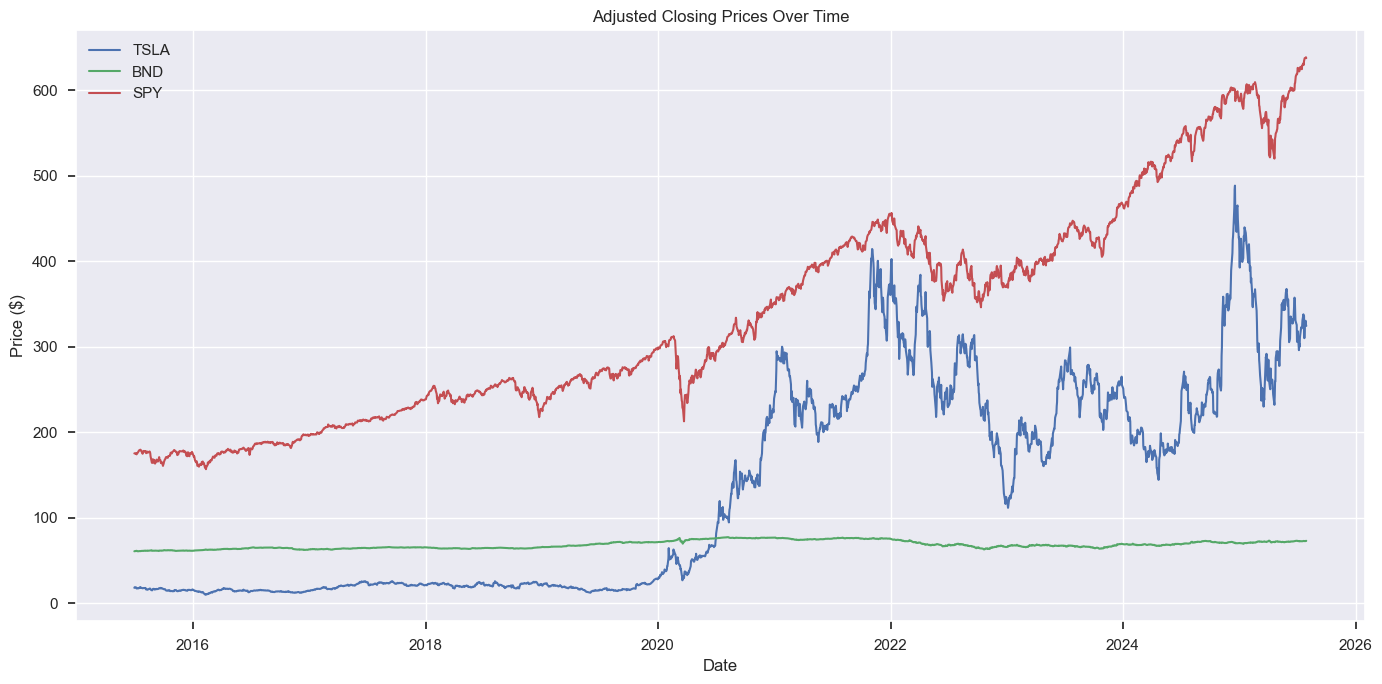

In [6]:
# -----------------------------------------------------------------------------
# Subtask 1.3: Exploratory Data Analysis (EDA)
# -----------------------------------------------------------------------------

# 📈 Plot Adjusted Closing Prices
plt.figure(figsize=(14, 7))
for col in processed_data.columns:
    plt.plot(processed_data.index, processed_data[col], label=col)
plt.title("Adjusted Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("D:/kaimtenx/project/week11/Time_Series_Portfolio_Management_Optimization/outputs/plots/adjusted_closing_prices.png")
plt.show()

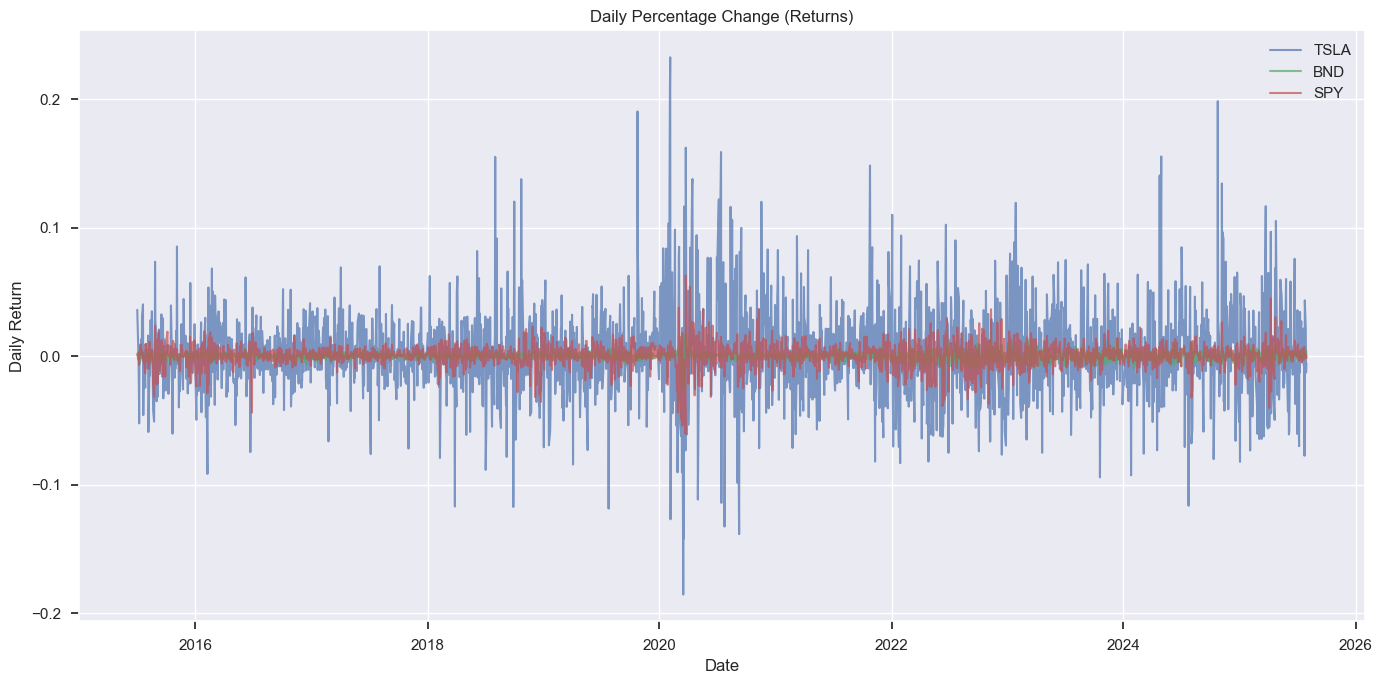

In [7]:
# 📊 Daily Returns
daily_returns = processed_data.pct_change().dropna()

plt.figure(figsize=(14, 7))
for col in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[col], label=col, alpha=0.7)
plt.title("Daily Percentage Change (Returns)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("D:/kaimtenx/project/week11/Time_Series_Portfolio_Management_Optimization/outputs/plots/daily_returns.png")
plt.show()

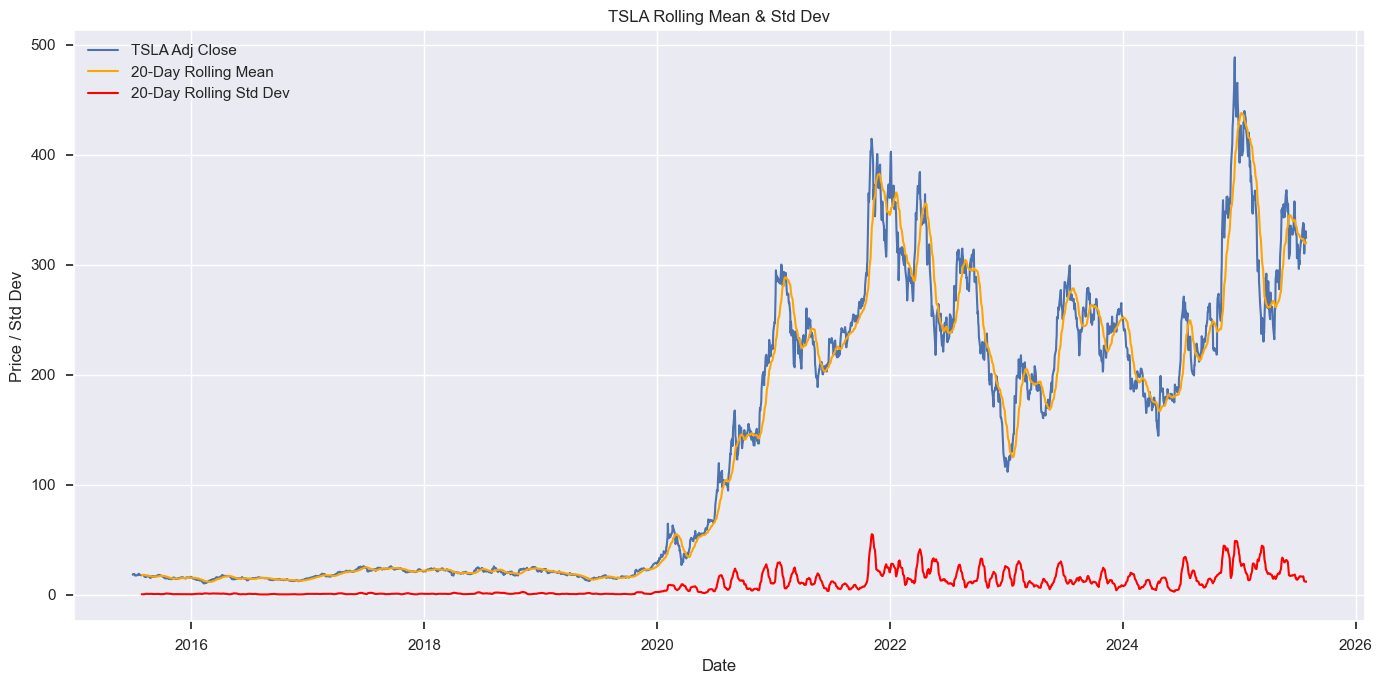

In [8]:
# 📉 TSLA Rolling Stats (Volatility)
rolling_window = 20
tsla_mean = processed_data['TSLA'].rolling(window=rolling_window).mean()
tsla_std = processed_data['TSLA'].rolling(window=rolling_window).std()

plt.figure(figsize=(14, 7))
plt.plot(processed_data.index, processed_data['TSLA'], label='TSLA Adj Close')
plt.plot(tsla_mean, label=f'{rolling_window}-Day Rolling Mean', color='orange')
plt.plot(tsla_std, label=f'{rolling_window}-Day Rolling Std Dev', color='red')
plt.title("TSLA Rolling Mean & Std Dev")
plt.xlabel("Date")
plt.ylabel("Price / Std Dev")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("D:/kaimtenx/project/week11/Time_Series_Portfolio_Management_Optimization/outputs/plots/tsla_rolling_stats.png")
plt.show()

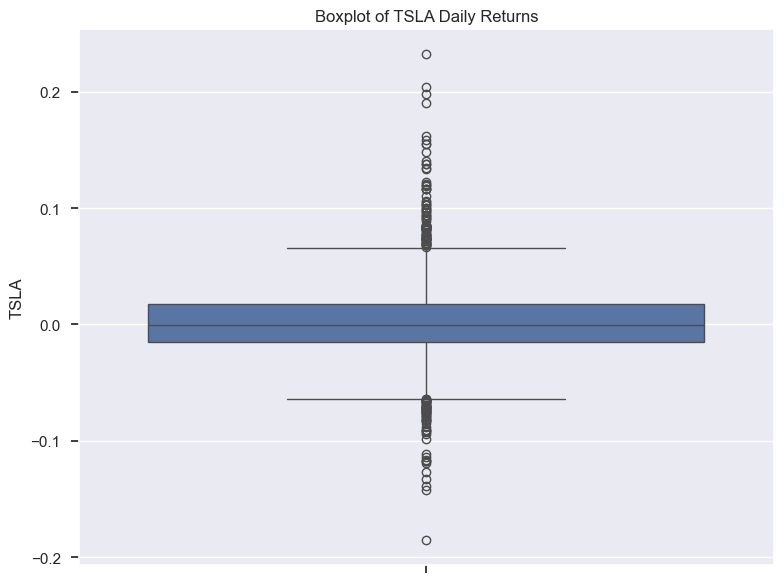

In [9]:
# 📦 Box Plot for TSLA Outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=daily_returns['TSLA'])
plt.title("Boxplot of TSLA Daily Returns")
plt.tight_layout()
plt.savefig("D:/kaimtenx/project/week11/Time_Series_Portfolio_Management_Optimization/outputs/plots/tsla_returns_boxplot.png")
plt.show()


In [10]:
# -----------------------------------------------------------------------------
# Subtask 1.4: ADF Test for Stationarity
# -----------------------------------------------------------------------------

def run_adf_test(series, name):
    print(f"\n📊 Augmented Dickey-Fuller Test for {name}")
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    for key, value in result[4].items():
        print(f"  Critical Value ({key}): {value:.4f}")
    if result[1] <= 0.05:
        print(f"✅ {name} is likely stationary (p <= 0.05)")
    else:
        print(f"⚠️ {name} is likely non-stationary (p > 0.05)")

# ADF Test for TSLA prices
run_adf_test(processed_data["TSLA"], "TSLA Closing Prices")

# ADF Test for TSLA returns
run_adf_test(daily_returns["TSLA"], "TSLA Daily Returns")


📊 Augmented Dickey-Fuller Test for TSLA Closing Prices
ADF Statistic: -1.4107
p-value: 0.5771
  Critical Value (1%): -3.4330
  Critical Value (5%): -2.8627
  Critical Value (10%): -2.5674
⚠️ TSLA Closing Prices is likely non-stationary (p > 0.05)

📊 Augmented Dickey-Fuller Test for TSLA Daily Returns
ADF Statistic: -12.8493
p-value: 0.0000
  Critical Value (1%): -3.4329
  Critical Value (5%): -2.8627
  Critical Value (10%): -2.5674
✅ TSLA Daily Returns is likely stationary (p <= 0.05)


In [11]:
# -----------------------------------------------------------------------------
# Subtask 1.5: Volatility and Risk Metrics
# -----------------------------------------------------------------------------
# 🔺 Overall direction of TSLA
start_price = processed_data['TSLA'].iloc[0]
end_price = processed_data['TSLA'].iloc[-1]
change = ((end_price - start_price) / start_price) * 100
print(f"\n📈 Overall TSLA change: {change:.2f}% from {processed_data.index[0].date()} to {processed_data.index[-1].date()}")



📈 Overall TSLA change: 1685.18% from 2015-07-01 to 2025-07-30


In [12]:
# 📉 TSLA Daily Return Summary
print("\n📊 TSLA Daily Return Stats:")
print(f"  Mean: {daily_returns['TSLA'].mean():.6f}")
print(f"  Std Dev: {daily_returns['TSLA'].std():.6f}")


📊 TSLA Daily Return Stats:
  Mean: 0.001690
  Std Dev: 0.033442


In [13]:
# 📉 TSLA Value at Risk (VaR 95%)
VaR_95 = np.percentile(daily_returns['TSLA'], 5)
print(f"\n📉 TSLA 1-day VaR at 95% confidence: {VaR_95:.4f}")
print(f"This implies a 5% chance of losing {abs(VaR_95):.2%} or more on a given day.")



📉 TSLA 1-day VaR at 95% confidence: -0.0481
This implies a 5% chance of losing 4.81% or more on a given day.


In [14]:
# 📈 TSLA Sharpe Ratio
risk_free_rate = 0.02 / 252  # daily risk-free rate
excess_returns = daily_returns["TSLA"] - risk_free_rate
sharpe_ratio = (excess_returns.mean() / excess_returns.std()) * np.sqrt(252)
print(f"\n📈 TSLA Annualized Sharpe Ratio: {sharpe_ratio:.2f}")



📈 TSLA Annualized Sharpe Ratio: 0.76
